# Caso Data 

## Importación de las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno
import pyodbc

## Exploración de la Data

In [3]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Como se muestra, la data tiene la información de la descripción, pero se muestra lo siguiente:
1) El campo "listed_in" que hace referencia al valor del genero, pero una pelicula o serie tiene puede tener muchos géneros
3) La fecha de la agregación a la plataforma puede ser diferente a la fecha que se hizo la pelicula

## Comenzamos a limpiar la información 

Primero revisaremos si tienen valores nulos

In [6]:
def reporte_nulos(data):
  data_rep_t=data.isna().sum().sort_values(ascending = False)
  data_rep_p=np.round(data.isna().sum().sort_values(ascending = False)/len(data)*100, 3)
  df_n = pd.concat([data_rep_t,data_rep_p], axis=1).reset_index()
  df_n.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df_n["Cant. Total"] = data.shape[0]
  df_n["Cant. No Nulos"] = data.shape[0] - df_n["Cant. Nulos"]
  df_n = df_n.reindex(columns=["Variable","Cant. Total","Cant. No Nulos","Cant. Nulos", "% Nulos"])
  print(df_n)
  fig = plt.figure(figsize = (5,10))
  ax1 = fig.add_subplot(2,1,1)
  missingno.bar(data, figsize=(5,5), fontsize=12, ax=ax1, color = "dodgerblue")

        Variable  Cant. Total  Cant. No Nulos  Cant. Nulos  % Nulos
0       director         8807            6173         2634   29.908
1        country         8807            7976          831    9.436
2           cast         8807            7982          825    9.368
3     date_added         8807            8797           10    0.114
4         rating         8807            8803            4    0.045
5       duration         8807            8804            3    0.034
6        show_id         8807            8807            0    0.000
7           type         8807            8807            0    0.000
8          title         8807            8807            0    0.000
9   release_year         8807            8807            0    0.000
10     listed_in         8807            8807            0    0.000
11   description         8807            8807            0    0.000


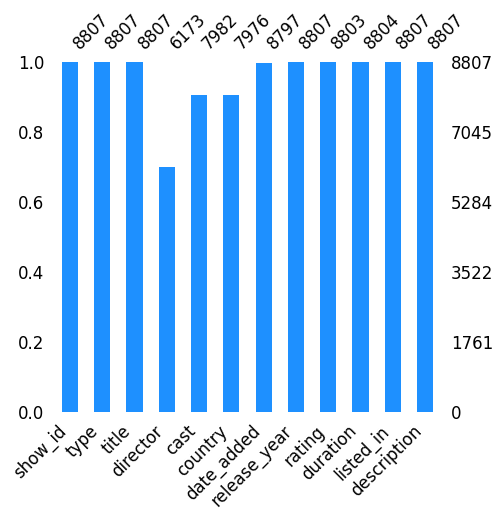

In [7]:
reporte_nulos(data)

Se encontrarón 6 variables con valores Nulos:
* director
* country
* cast
* date_added
* rating
* duration

De los cuales se tomaran las siguientes acciones:
1) Para los valores nulos de "director" se cambiará por valores "Null" 
2) Para los valores nulos de "country" se cambiará por valores "Null" 
3) Para los valores nulos de "cast" se cambiará por valores "Null" 
4) Para los valores nulos de "date_added" (que es la fecha de ingreso de la serie o pelicula en la plataforma) se eliminará los registros para el análisis.
5) Para los valores nulos de "rating" (que es el ranking) se eliminará los registros para el análisis.
6) Para los valores nulos de "duration" (que es la cantidad que dura el video) se eliminará los registros para el análisis.

La razón por la cual se elimina esos registros, es porque se considerá que son datos necesarios para poder hacer el siguiente análisis

In [8]:
data['director'] = data['director'].fillna('Null')
data['country'] = data['country'].fillna('Null')
data['cast'] = data['cast'].fillna('Null')
data = data.dropna(axis=0)
data = data.reset_index()

        Variable  Cant. Total  Cant. No Nulos  Cant. Nulos  % Nulos
0          index         8790            8790            0      0.0
1        show_id         8790            8790            0      0.0
2           type         8790            8790            0      0.0
3          title         8790            8790            0      0.0
4       director         8790            8790            0      0.0
5           cast         8790            8790            0      0.0
6        country         8790            8790            0      0.0
7     date_added         8790            8790            0      0.0
8   release_year         8790            8790            0      0.0
9         rating         8790            8790            0      0.0
10      duration         8790            8790            0      0.0
11     listed_in         8790            8790            0      0.0
12   description         8790            8790            0      0.0


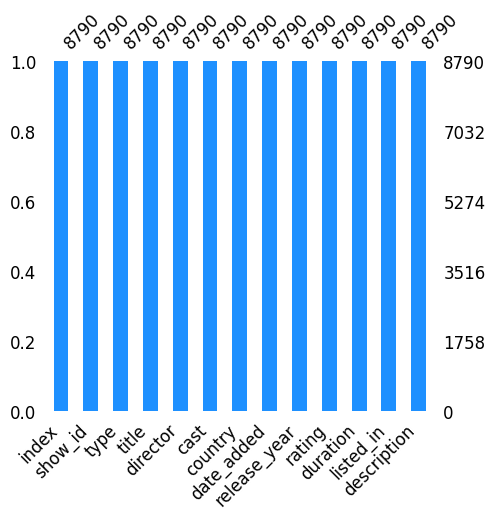

In [9]:
reporte_nulos(data)

Se limpio la información para poder analizarla por medio de gráficos y eliminamos registros duplicados

In [10]:
data_limpia = data.drop_duplicates(keep="first").reset_index(drop = True)
data_limpia.reset_index(drop=True)
data_limpia = data_limpia[['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']]
data_limpia

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Null,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Null,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Null,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Null,Null,Null,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Null,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8786,s8804,TV Show,Zombie Dumb,Null,Null,Null,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8787,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8788,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
lista = []
idMovie = 1
for i in data_limpia.index:
    lista1 = []
    fecha = data_limpia['date_added'][i]
    mes = data_limpia['date_added'][i].lstrip().split(" ")[0]
    dia = data_limpia['date_added'][i].lstrip().split(" ")[1].split(',')[0]
    año = data_limpia['date_added'][i].lstrip().split(" ")[2]
    lista1.append(idMovie)
    
    for j in data_limpia.columns:
        
        if j == 'date_added':
            lista1.append(mes+' '+dia+', '+año)
        else:
            lista1.append(data[j][i])
    
    lista.append(lista1)
    idMovie += 1

columnas = ['idMovie']
for x in data_limpia.columns:
    x = columnas.append(x)


data_limpia = pd.DataFrame(data=lista, columns=columnas)
data_limpia['fecha'] = pd.to_datetime(data_limpia['date_added'])
data_limpia = data_limpia[['idMovie','show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description','fecha']]
data_limpia

,idMovie,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,fecha
0,1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Null,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,2,s2,TV Show,Blood & Water,Null,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Null,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,4,s4,TV Show,Jailbirds New Orleans,Null,Null,Null,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,5,s5,TV Show,Kota Factory,Null,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8786,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20
8786,8787,s8804,TV Show,Zombie Dumb,Null,Null,Null,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01
8787,8788,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01
8788,8789,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11


# Tabla Género

In [12]:
lista_generos = []
for i in data_limpia.index:
    for j in data_limpia['listed_in'][i].split(", "):
        lista_generos.append(j)

lista_generos = list(set(lista_generos))

idLisend = 1
lista = []
for i in lista_generos:
    lista.append([idLisend,i])
    idLisend +=1
    
listed_in = pd.DataFrame(data=lista,columns=['idLisend','listed'])
listed_in.head()


,idLisend,listed
0,1,Korean TV Shows
1,2,Stand-Up Comedy
2,3,TV Horror
3,4,Dramas
4,5,Action & Adventure


In [13]:
lista = []
idMovieListed = 1
for i in data_limpia.index:
    for j in data_limpia['listed_in'][i].split(", "):
        for x in listed_in.index:
            if j==listed_in['listed'][x]:
              lista.append([idMovieListed,data_limpia['idMovie'][i],listed_in['idLisend'][x]])
              idMovieListed +=1

MovieListed = pd.DataFrame(data=lista,columns=['idMovieListed','idMovie','idLisend'])
MovieListed.head()

,idMovieListed,idMovie,idLisend
0,1,1,40
1,2,2,17
2,3,2,36
3,4,2,26
4,5,3,22


In [14]:
lista_paises = []
for i in data_limpia.index:
    for j in data_limpia['country'][i].lstrip().split(", "):
        lista_paises.append(j)

lista_paises = list(set(lista_paises))

lista = []
idCountry = 1
for x in lista_paises:
    lista.append([idCountry,x])
    idCountry+=1
    
Country = pd.DataFrame(data=lista,columns=['idCountry','country'])
Country

,idCountry,country
0,1,
1,2,China
2,3,Uganda
3,4,Mongolia
4,5,Ghana
...,...,...
123,124,Soviet Union
124,125,Slovenia
125,126,Colombia
126,127,Algeria


In [15]:
lista_director = []
for i in data_limpia.index:
    for j in data_limpia['director'][i].lstrip().split(", "):
        lista_director.append(j)

lista_director = list(set(lista_director))

lista = []
idDirector = 1
for x in lista_director:
    lista.append([idDirector,x])
    idDirector+=1
    
Director = pd.DataFrame(data=lista,columns=['idDirector','Director'])
Director

,idDirector,Director
0,1,John Voorhees
1,2,Simon Savelyev
2,3,Vetrimaaran
3,4,Kenny Young
4,5,Jeremy Coon
...,...,...
4987,4988,Pepe Bojórquez
4988,4989,Benjamin Ree
4989,4990,Tarek Al Eryan
4990,4991,Olivia Newman


In [16]:
lista = []
idDirectorMovie = 1
for i in data_limpia.index:
    for j in data_limpia['director'][i].lstrip().split(", "):
        for x in Director.index:
            if j==Director['Director'][x]:
              lista.append([idDirectorMovie,data_limpia['idMovie'][i],Director['idDirector'][x]])
              idMovieListed +=1

DirectorMovie= pd.DataFrame(data=lista,columns=['idDirectorMovie','idMovie','idDirector'])
DirectorMovie.head()

,idDirectorMovie,idMovie,idDirector
0,1,1,800
1,1,2,4013
2,1,3,1223
3,1,4,4013
4,1,5,4013


In [17]:
lista_type = []
for i in data_limpia.index:
    for j in data_limpia['type'][i].lstrip().split(", "):
        lista_type.append(j)

lista_type = list(set(lista_type))

lista = []
idType = 1
for x in lista_type:
    lista.append([idType,x])
    idType+=1
    
Type = pd.DataFrame(data=lista,columns=['idType','type'])
Type

,idType,type
0,1,TV Show
1,2,Movie


In [18]:
lista_rating = []
for i in data_limpia.index:
    for j in data_limpia['rating'][i].lstrip().split(", "):
        lista_rating.append(j)

lista_rating = list(set(lista_rating))

lista = []
idrating = 1
for x in lista_rating:
    lista.append([idrating,x])
    idrating+=1
    
Rating = pd.DataFrame(data=lista,columns=['idrating','rating'])
Rating

,idrating,rating
0,1,TV-MA
1,2,TV-Y7-FV
2,3,PG
3,4,NR
4,5,UR
5,6,TV-Y7
6,7,TV-14
7,8,R
8,9,TV-G
9,10,TV-Y


In [19]:
lista_cast = []
for i in data_limpia.index:
    for j in data_limpia['cast'][i].split(","):
        lista_cast.append(j.lstrip().rstrip())

lista_cast = list(set(lista_cast))

lista = []
idcast = 1
for x in lista_cast:
    lista.append([idcast,x])
    idcast+=1
    
Cast= pd.DataFrame(data=lista,columns=['idCast','cast'])
Cast

,idCast,cast
0,1,Chetan Sharma
1,2,Catherine Reitman
2,3,Jessica Hann
3,4,Paul du Toit
4,5,Uriah Shelton
...,...,...
36388,36389,Anna Hopkins
36389,36390,Freeway Rick Ross
36390,36391,Vamsi raj Nekkanti
36391,36392,Christoffer Nelwan


In [20]:
lista = []
idCastMovie = 1
for i in data_limpia.index:
    for j in data_limpia['cast'][i].lstrip().split(", "):
        lista.append([idCastMovie,data_limpia['idMovie'][i],int(Cast[Cast['cast']==(j.lstrip().rstrip())].idCast)])
        idCastMovie +=1

CastMovie= pd.DataFrame(data=lista,columns=['idDirectorCast','idMovie','idCast'])
CastMovie.head()

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_13932\821649944.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  lista.append([idCastMovie,data_limpia['idMovie'][i],int(Cast[Cast['cast']==(j.lstrip().rstrip())].idCast)])


,idDirectorCast,idMovie,idCast
0,1,1,34639
1,2,2,23088
2,3,2,15261
3,4,2,27448
4,5,2,3850


In [23]:
data_bruta = pd.merge(data_limpia, Rating ,on=['rating'])
data_bruta = pd.merge(data_bruta, Type ,on=['type'])
data_bruta = pd.merge(data_bruta, Country ,on=['country'])
data_bruta

,idMovie,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,fecha,idrating,idType,idCountry
0,1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Null,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,12,2,86
1,2,s2,TV Show,Blood & Water,Null,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,1,1,76
2,3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Null,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1,1,69
3,4,s4,TV Show,Jailbirds New Orleans,Null,Null,Null,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,1,1,69
4,5,s5,TV Show,Kota Factory,Null,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,1,1,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,8786,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,8,2,86
7470,8787,s8804,TV Show,Zombie Dumb,Null,Null,Null,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,6,1,69
7471,8788,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,8,2,86
7472,8789,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,3,2,86


In [24]:
Movie = data_bruta[['idMovie','title','description','duration','fecha','idCountry','idType','show_id','release_year','idrating']]
Movie

,idMovie,title,description,duration,fecha,idCountry,idType,show_id,release_year,idrating
0,1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",90 min,2021-09-25,86,2,s1,2020,12
1,2,Blood & Water,"After crossing paths at a party, a Cape Town t...",2 Seasons,2021-09-24,76,1,s2,2021,1
2,3,Ganglands,To protect his family from a powerful drug lor...,1 Season,2021-09-24,69,1,s3,2021,1
3,4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",1 Season,2021-09-24,69,1,s4,2021,1
4,5,Kota Factory,In a city of coaching centers known to train I...,2 Seasons,2021-09-24,111,1,s5,2021,1
...,...,...,...,...,...,...,...,...,...,...
7469,8786,Zodiac,"A political cartoonist, a crime reporter and a...",158 min,2019-11-20,86,2,s8803,2007,8
7470,8787,Zombie Dumb,"While living alone in a spooky town, a young g...",2 Seasons,2019-07-01,69,1,s8804,2018,6
7471,8788,Zombieland,Looking to survive in a world taken over by zo...,88 min,2019-11-01,86,2,s8805,2009,8
7472,8789,Zoom,"Dragged from civilian life, a former superhero...",88 min,2020-01-11,86,2,s8806,2006,3


## Exportado de Archivo Excel

In [41]:
ruta = 'Peliculas.xlsx'
with pd.ExcelWriter(ruta) as writer:
    listed_in.to_excel(writer,sheet_name='listed_in',index=False)
    MovieListed.to_excel(writer,sheet_name='MovieListed',index=False)
    Country.to_excel(writer,sheet_name='Country',index=False)
    Director.to_excel(writer,sheet_name='Director',index=False)
    DirectorMovie.to_excel(writer,sheet_name='DirectorMovie',index=False)
    Type.to_excel(writer,sheet_name='Type',index=False)
    Rating.to_excel(writer,sheet_name='Rating',index=False)
    Cast.to_excel(writer,sheet_name='Cast',index=False)
    CastMovie.to_excel(writer,sheet_name='CastMovie',index=False)
    Movie.to_excel(writer,sheet_name='Movie',index=False)


## Exportado de SQL

In [ ]:
import pyodbc
server = 'devserversakila.database.windows.net' 
db1 = 'Peliculas' 
uname = 'gmujica' 
pword = '1234GNmd' 


cnxn = pyodbc.connect(driver='{ODBC Driver 17 for SQL Server}', Server=server, database=db1,Uid=uname, Pwd=pword)
cursor = cnxn.cursor()

for index, row in Rating.iterrows():
     cursor.execute("INSERT INTO [dbo].[Rating] ([idRating],[Rating]) VALUES (?,?)", row.idrating, row.rating)

for index, row in Cast.iterrows():
     cursor.execute("INSERT INTO [dbo].[Cast] ([idCast],[name]) VALUES (?,?)", row.idCast, row.Cast)

for index, row in Director.iterrows():
     cursor.execute("INSERT INTO [dbo].[Director]([idDirector],[Director]) VALUES(?,?)", row.idDirector, row.Director)

for index, row in Director.iterrows():
     cursor.execute("INSERT INTO [dbo].[Director]([idDirector],[Director]) VALUES(?,?)", row.idDirector, row.Director)

for index, row in listed_in.iterrows():
     cursor.execute("INSERT INTO [dbo].[listed_in] ([idListend],[listed]) VALUES (?,?)", row.idListend, row.listed)


cnxn.commit()
cursor.close()